In [1]:
import tensorflow as tf
from tensorflow import keras
import urllib
import platform
import numpy as np
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt


In [2]:
opSys = platform.system()

PROJECT_ROOT = os.path.dirname(os.path.abspath("./"))
print(PROJECT_ROOT)

if opSys == 'Windows':
    images_Processed_F = f"{PROJECT_ROOT}\\Data\\Processed-images\\FaithfulBlocks"
    images_Processed_V = f"{PROJECT_ROOT}\\Data\\Processed-images\\VanillaBlocks"
elif opSys == 'Linux':
    images_Processed_F = f"{PROJECT_ROOT}/FaithfulAi/Data/Processed-images/FaithfulBlocks"
    images_Processed_V = f"{PROJECT_ROOT}/FaithfulAi/Data/Processed-images/VanillaBlocks"

channels = 3
image_index = 500

c:\Users\Arno\source\FaithfulAi


In [3]:
input_img = tf.keras.layers.Input(shape=(256, 256, channels))

l1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)
l3 = tf.keras.layers.MaxPool2D(padding='same')(l2)

l4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)
l6 = tf.keras.layers.MaxPool2D(padding='same')(l5)

l7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)

l8 = tf.keras.layers.UpSampling2D()(l7)
l9 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)

l11 = tf.keras.layers.add([l10, l5])

l12 = tf.keras.layers.UpSampling2D()(l11)
l13 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)

l15 = tf.keras.layers.add([l14, l2])

decoded_image = tf.keras.layers.Conv2D(channels, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

auto_encoder = tf.keras.models.Model(inputs=(input_img), outputs=decoded_image)

In [4]:
auto_encoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [5]:
def get_training_data():
    real_image_treat_as_y = []
    real_image_alphas = []
    downsize_image_treat_as_x = []
    
    for img in os.listdir(images_Processed_F):

        try:
            image = cv2.imread(f"{images_Processed_F}/{img}", cv2.IMREAD_UNCHANGED)

            if channels == 4:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
                reshaped_image = cv2.resize(image, (256, 256))
                real_image_alphas.append(reshaped_image[:, :, 3])

            elif channels == 3:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA) 
                reshaped_image = cv2.resize(image, (256, 256))
                real_image_alphas.append(reshaped_image[:, :, 3])
                
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
                reshaped_image = cv2.resize(image, (256, 256))
                
            real_image_treat_as_y.append(reshaped_image)

            image = cv2.resize(image, (100, 100))
            reshaped_image = cv2.resize(image, (256, 256))
            downsize_image_treat_as_x.append(cv2.resize(image, (256, 256)))

        except Exception as e:
            print(e)

    return (np.array(downsize_image_treat_as_x), np.array(real_image_treat_as_y), np.array(real_image_alphas))

In [6]:
downsized_images, real_images, image_alphas = get_training_data()

In [7]:
print(downsized_images.shape)
print(real_images.shape)
print(image_alphas.shape)

(696, 256, 256, 3)
(696, 256, 256, 3)
(696, 256, 256)


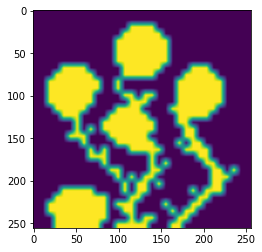

In [8]:
plt.imshow(image_alphas[image_index])

In [9]:
# tf.config.run_functions_eagerly(True)

In [10]:
auto_encoder.fit(downsized_images, real_images, epochs=1, batch_size=32, shuffle=True, validation_split=0.15)
# auto_encoder.fit(downsized_images, real_images, epochs=5, batch_size=32, shuffle=True, validation_split=0.15)

In [1]:
sr1 = auto_encoder.predict(downsized_images)
sr1 = cv2.cvtColor(sr1, cv2.COLOR_BGR2BGRA) 

sr1[:, :, 3] = image_alphas
# sr1 = cv2.merge((sr1, image_alphas))

NameError: name 'auto_encoder' is not defined

In [2]:
plt.figure(figsize=(256, 256))

ax = plt.subplot(10, 10, 1)
plt.imshow(downsized_images[image_index])

ax = plt.subplot(10, 10, 2)
plt.imshow(downsized_images[image_index], interpolation="bicubic")

# ax = plt.subplot(10, 10, i)
# plt.imshow(encoded_imgs[image_index].reshape((64*64, 256)))

ax = plt.subplot(10, 10, 3)
plt.imshow(sr1[image_index])

ax = plt.subplot(10, 10, 3)
plt.imshow(sr1[image_index])

ax = plt.subplot(10, 10, 4)
plt.imshow(real_images[image_index])

plt.savefig('./')

NameError: name 'plt' is not defined